# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 1.1

1. Estimation of the average of a uniform distribution $\langle r \rangle = \int_0^1 r dr = 1/2$


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from astropy.modeling import models, fitting

In [9]:
M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
np.random.seed(0)     # Fixing random seed for reproducibility

x = np.arange(N)      # [0,1,2,...,N-1] 

The average is estimated from a sample of a uniform distribution built using a pseudo-random number generator - kindly provided by professor Galli- in the interval $[0,1)$. It's important to notice that the sample itself is not random nor uniform: the seed used for each run is always the same. The sampling algorithm is quite complex but still made up of basic arithmetic operations, therefore, in principle, deterministic. However, the numbers in the sample appear random enough for the use made: the sample is small enough to avoid any repetition or cycle and signs of non-ideality.

Since this is a stochastic simulation, the final average is not expected to yield an exact result. The uncertainty is estimated as the stadard deviation, but on a large sample this value would be excessive. In order to gain a better estimate, the sample is divided in $N$ "blocks", each of which will yield an average. The final average is given by the average of the result of each single block - equivalent to the average on the whole sample- while the uncertainty is given by the standard deviation of the average, which scales as $\frac{\sigma}{\sqrt{N-1}}$. By choosing $N=100$, the uncertainty is reduced by almost a factor 10. The number of blocks $N$ needs to be chosen so that the size of each sample is large enough to be statistically relevant - therefore at least $L= \frac{M}{N} > 30$. By choosing $M=10^6$ total sample size, the choice $N=100$ is optimal to have both the block size and number of blocks statistically relevant. 

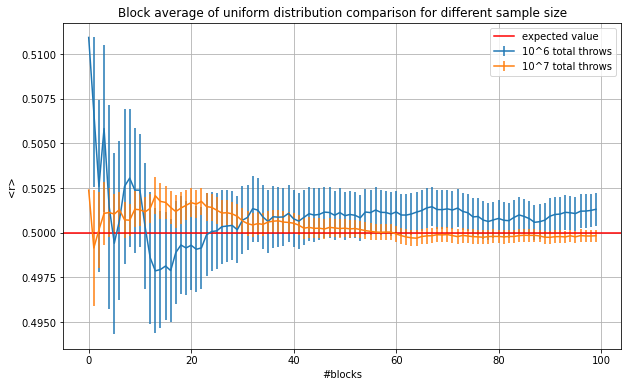

In [4]:
file_name=["data_1_1/progressive_averages.txt","data_1_1/progressive_averages_1.txt"]
label_name=["6","7"]

fig = plt.figure(figsize=[10,6])

for i in [0,1]:
    prog_ave,err = np.loadtxt(file_name[i],usecols=(0,1),unpack='true')
    plt.errorbar(x, prog_ave, yerr=err, label='10^'+label_name[i]+' total throws')
plt.axhline(y=0.5, color='r', label = 'expected value')
plt.xlabel('#blocks')
plt.ylabel('<r>')
plt.legend()
plt.title('Block average of uniform distribution comparison for different sample size')
plt.grid(True)
plt.show()

The graph compares the value of the average based on the number of blocks used, each with its statistical uncertainty, obtained by varying the total number of throws. It can be seen quite clearly how the uncertainty is reduced with the number of blocks, as the error bars get smaller with the block number. The run with the larger sample size converges faster to the expected value, due to the fact that statistical fluctuations are more damped. Also the first run is statistically consistent with the expected value in a $2 \sigma$ interval.

2. Estimate of the expectation value of the variance $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$, which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ 

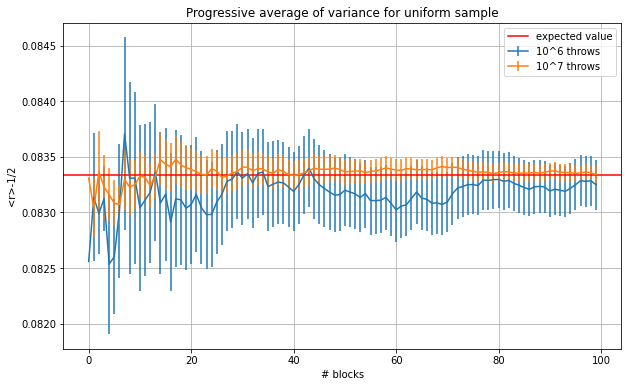

In [12]:
fig = plt.figure(figsize=[10,6])

prog_ave,err = np.loadtxt("data_1_1/progressive_variance.txt",usecols=(0,1),unpack='true')
plt.errorbar(x,prog_ave,yerr=err, label='10^6 throws')

prog_ave,err = np.loadtxt("data_1_1/progressive_variance_1.txt",usecols=(0,1),unpack='true')
plt.errorbar(x,prog_ave,yerr=err, label='10^7 throws')

plt.xlabel('# blocks')
plt.ylabel('<r>-1/2')
plt.axhline(y=1/12, color='r', label = 'expected value')
plt.title('Progressive average of variance for uniform sample')
plt.legend()
plt.grid(True)
plt.show()

The graph shows the progressive estimate for the variance of a uniform process, computed as $\sigma^2 = \langle(r-\frac{1}{2})^2 \rangle$: a random number $r$ is sampled between $[0,1)$ is used to estimate the single variance, which is then averaged with the same method as explained before for the average value. 

This average value of $\sigma^2$ is **not** the statistical uncertainty on the average of the sample shown before, since it converges to a constant value: it is the mean standard deviation between each single random value and the expected value. The block method is introduced exactly to avoid a constant error value even when varying the sample size. By using the *variance of the mean* we ensure a smaller uncertainty on the final estimate as the sample grows. 

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
    We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.

0.51


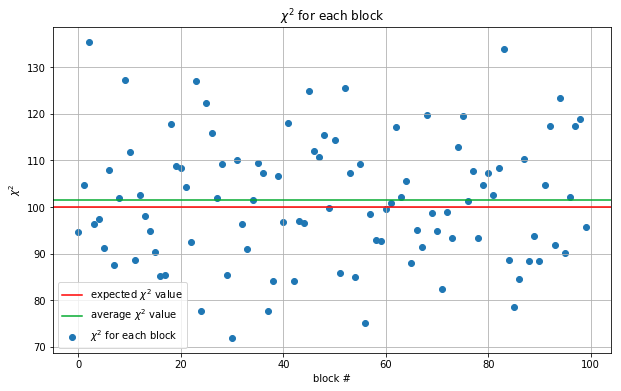

In [6]:
fig = plt.figure(figsize=[10,6])

chi = np.loadtxt("data_1_1/chi_sq.txt",unpack='true')

# estimation of average chi^2 value and counting percentage of failed tests
av_chi = 0
no_unif = 0
for i in range (len(chi)):
    av_chi += chi[i]
    if (chi[i] > 100):
        no_unif += 1
av_chi /= len(chi)
print (no_unif/len(chi))

plt.axhline(y=100, color='r', label = 'expected $\chi^2$ value')
plt.axhline(y=av_chi, color='xkcd:kelly green', label = 'average $\chi^2$ value')
plt.scatter(x, chi , label = '$\chi^2$ for each block')
plt.xlabel('block #')
plt.ylabel('$\chi^2$')
plt.title('$\chi^2$ for each block')
plt.legend()
plt.grid(True)
plt.show()

The number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely. The graph thus shows clearly how the pseudo-random number generator is, in fact, *pseudo-*. 

The $\chi^2$ value is an estimator of the adequancy of a certain distribution, in this case uniform, to describe a set of observables: it compares the observed value to the expected value and divides it with the variance. A low enough value of the sum of all contributes, the $\chi^2$, indicates that the distribution which describes the observabels is *probably* uniform (or, more precisely, that it is quite unlikely for the distribution to *not* be uniform). 

The values of $\chi^2$ for each block scattered around the expected value of $\chi^2 = 100$ show clearly that for about 40% of blocks the $\chi^2$ test is failed, by 10 of these by more than 20%. The sampled distribution cannot be confidently defined as *uniform*. 

However, by looking at the average value of $\chi^2$ on all blocks, we see that the difference with the exptected value is minimal. This is not an actual indication of the reliabilty of the numer generator or that *statistically it can be considered uniform* - were it actually uniform, one would expect much more consistent results of the test; it still shows that it is adequate for the use it is intended for. The distribution might not be uniform, but it presents random enough values - in the acception that the non-ideality is not an issue.

### Exercise 1.2
- To check the Central Limit Theorem:
    1. Sample by using **method of the inversion of the cumulative distribution** the generic exponential distribution $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ anche a generic Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ 
    2. Compare the histrograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ for different sample sizes, $N=1, 2, 10, 100$, with $x_i$ being a *standard* die, an *exponential* die ($\lambda=1$) and a *Lorentzian* die ($\mu=0$ and $\Gamma=1$)

In [5]:
name=["standard","exponential","lorentzian"]
color=['xkcd:azure', 'xkcd:kelly green', 'xkcd:burnt orange']
sample_size=["1","2","5","10","100"]
n_bins=100

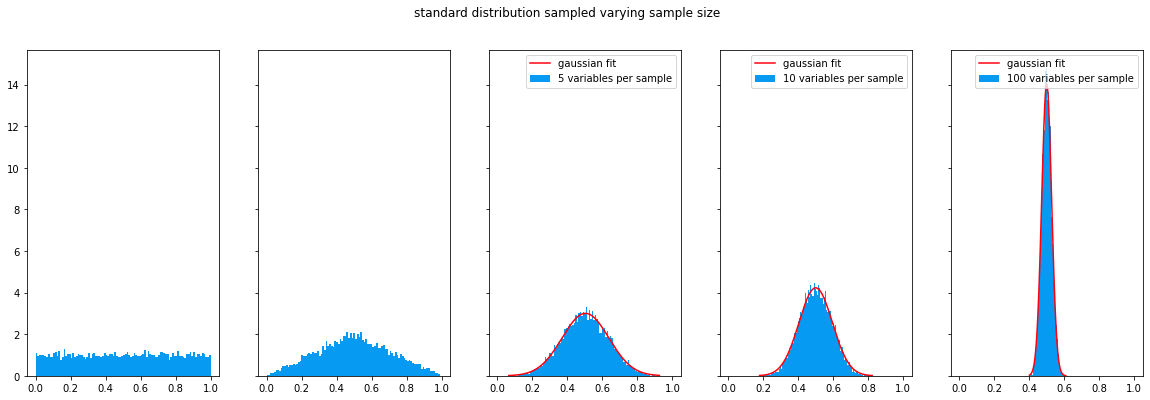

In [6]:
fig,axs = plt.subplots(1, 5, sharey=True, sharex = True, figsize=[20,6])
fig.suptitle(name[0] + ' distribution sampled varying sample size') 
i=0
for n in sample_size:
    file_name = "data_1_2/"+ name[0] +"_" + n + ".txt"
    x=np.loadtxt(file_name, unpack='true')
    bin_heights, bin_borders, _ = axs[i].hist(x, bins = n_bins, density= True, label= n+' variables per sample', color = color[0])
    if (i>1):
        bin_widths = np.diff(bin_borders)
        bin_centers = bin_borders[:-1] + bin_widths / 2

        t_init = models.Gaussian1D()
        fit_t = fitting.LevMarLSQFitter()
        t = fit_t(t_init, bin_centers, bin_heights)

        x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)

        x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
        axs[i].plot(x_interval_for_fit, t(x_interval_for_fit), label='gaussian fit', c = "xkcd:bright red")
        axs[i].legend(loc='upper right')
    
    i+=1
    
plt.show()

The first distribution considered is uniform in $[0,1)$, as it can be clearly seen in the first graph which simply collects the random data sampled. The other graphs present the distribution of the averages over an increasing number of elements randolmy selected. In order to compare the various distributions, all graphs are normalised and share the same axes. It can be clearly seen that, as the sample size increases, the distribution narrows and gets higher around the distribution average $\langle r \rangle = \frac{1}{2}$. As expected, the distribution tends to a gaussian distribution: with $N=5$ the characteristic curve starts to appear, until it reaches the almost-too-perfect fit for $N=100$ with a normalised gaussian. This justifies the whole concept of experimenting more than once: the estimate nears the real value with decreasing uncertainty, as the distribution gets narrower. This simple simulation shows the validity of the Central Limit Theorem for uniformly distributed numbers.

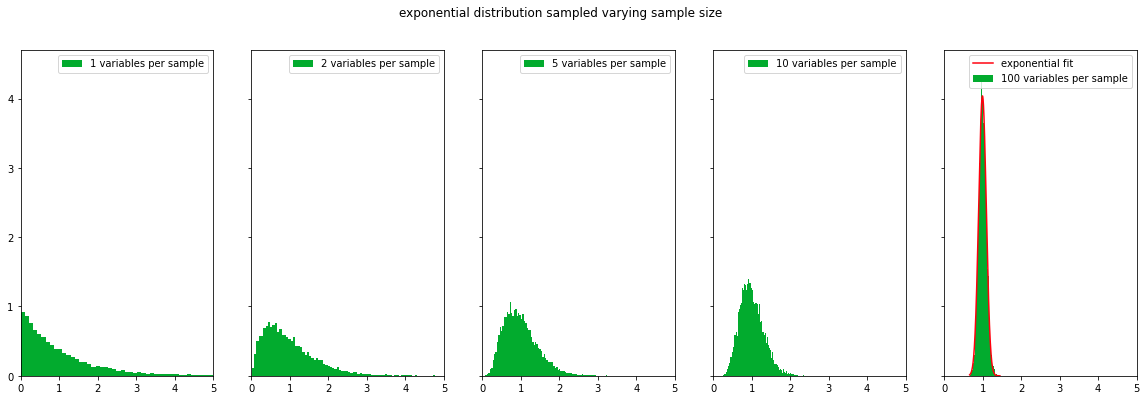

In [42]:
fig,axs = plt.subplots(1, 5, sharey=True, sharex= True, figsize=[20,6])
fig.suptitle(name[1] + ' distribution sampled varying sample size', ) 
i=0
for n in sample_size:
    file_name = "data_1_2/"+ name[1] +"_" + n + ".txt"
    x=np.loadtxt(file_name, unpack='true')
    bin_heights, bin_borders, _ = axs[i].hist(x, bins = n_bins, density= True, label= n+' variables per sample', color = color[1])
    axs[i].set_xlim([0,5])
    axs[i].legend()
    i+=1
        
bin_widths = np.diff(bin_borders)
bin_centers = bin_borders[:-1] + bin_widths / 2

t_init = models.Gaussian1D()
fit_t = fitting.LevMarLSQFitter()
t = fit_t(t_init, bin_centers, bin_heights)

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
axs[4].plot(x_interval_for_fit, t(x_interval_for_fit), label='gaussian fit', c = "xkcd:bright red")
axs[4].legend(loc='upper right')

plt.show()

These graphs show similar results as the previous for an exponentially decreasing distribution on $[0, \infty)$: 

$$ p(x) = \lambda e^{-\lambda x}$$

In order to sample a non-uniform random distribution such as this $p(x)$, we need to recur to its cumulative function $$ F_x(x) = \int_{x_0}^{x} p(x') dx' = 1 - e^{-\lambda x}$$ 
where $x_0 = 0$ in this particular case. Using the cumulative's properties, we can obtain our distribution from any other distribution as $p_y(y)\dfrac{dy}{dx} = p_x(x)$. If $F_x(x)$ is known, analytical and invertible (which is not always possible, such as for the gaussian distribution), we can sample the exponential distribution by generating uniform variables $y$ and taking $y \equiv F_x(x)$. We can obtain the exponentially distributed $x$ as:
$$x = F_x^{-1} = -\frac{1}{\lambda} \log (1-y)$$ 

The main difference with the uniform distribution is that the number of elements per sample needs to be much larger in order for the gaussian distribution to appear: even for $N=10$ the distribution still presents a steeper side, typical of an exponential descent. However, for $N=100$ the distribution tends to a gaussian centred around $\langle r \rangle = 1$, presenting symmetric features that were previously absent.

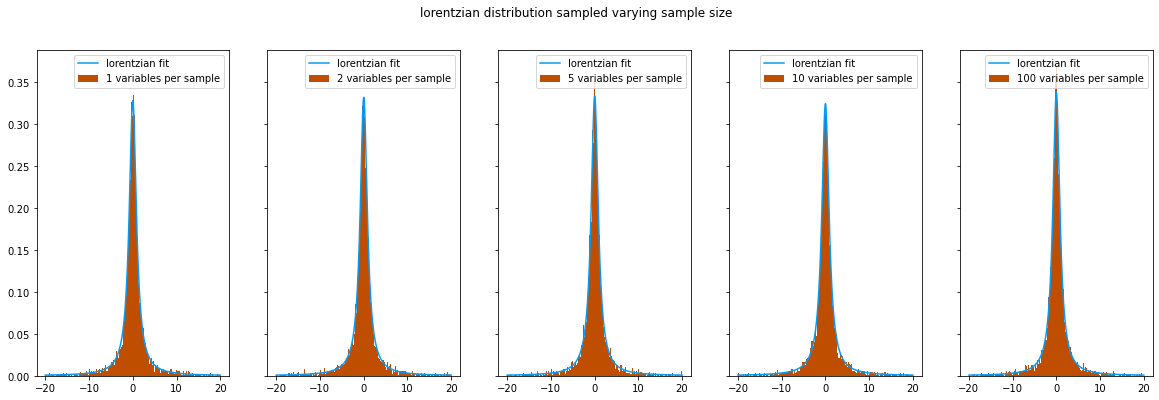

In [7]:
fig,axs = plt.subplots(1, 5, sharey=True, sharex = True, figsize=[20,6])
fig.suptitle(name[2] + ' distribution sampled varying sample size') 
i=0
binwidth = 0.1
bins_n =np.arange(-20, 20 + binwidth, binwidth)

for n in sample_size:
    file_name = "data_1_2/"+ name[2] +"_" + n + ".txt"
    x=np.loadtxt(file_name, unpack='true')
    bin_heights, bin_borders, _ = axs[i].hist(x, bins = bins_n, range = [-20,20], density= True, label= n+' variables per sample', color = color[2])

    bin_widths = np.diff(bin_borders)
    bin_centers = bin_borders[:-1] + bin_widths / 2

    t_init = models.Lorentz1D()
    fit_t = fitting.LevMarLSQFitter()
    t = fit_t(t_init, bin_centers, bin_heights)

    x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)

    x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
    axs[i].plot(x_interval_for_fit, t(x_interval_for_fit), label='lorentzian fit', c = "xkcd:azure")
    axs[i].legend(loc='upper right')
    i+=1

        
plt.show()

This last example shows how the CLT is not valid for any normalised distribution. The data was sampled from a lorentzian distribution 

$$f(x) = \frac{1}{\pi} \frac{\Gamma}{x^2 + \gamma ^2}$$

The corresponding cumulative to the distribution  is

$$ F(x) = \frac{1}{\pi} \tan^{-1} \left( \frac{x}{\Gamma} \right) + \frac {1}{2}$$

Therefore, we can generate elements following the $f(x)$ distribution as 

$$ x = F_x^{-1}(y) = \Gamma \tan \left( y - \frac{1}{2} \right) $$ 
where $y$ is sampled uniformely

The outcome keeps its distinctive lorentzian shape for any size of the sample whilst never converging to a gaussian shape. This is because the lorentzian distribution does not satisfy the hypotesis fo the CLT, mainly in the fact that it has a non-finite second moment (the variance): even by increasing the sample size to obtain an average the variance cannot converge to 0. 

This affects the graphs themselves: in order to show clearly the lorentzian shape, I had to limit the histogram between $[-20,20]$, since the dataset generated from this distribution includes elements very far away from the mean $\langle r \rangle = 0$. Even by increasing the number of elements that constitute the sample average, these wide fluctuations prevent the variance to converge.

### Exercise 1.3
- **Simulate** the Buffon’s experiment: a needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$


The experiment was reduced to the simulation of a needle of length $L=0.5$ "dropped" over a single couple of lines $d=1$ apart. To simulate the drop of the needle, we need two different values which represent the distance of the head and of the pin of the needle from the bottom line; if either is smaller than 0 or larger than $d$, $N_{hit}$ is increased by one in value. 

In order to satisfy the (obvious) requirement that all needles are the same length $L$, a first coordinate is randomly generated between 0 and $d$, while the second is randomly generated in the interval $[-L, L]$, to consider all the possible orientations the needle can land with. The main problem with this method is that this second value is not distributed uniformely between the extremes, as it represents not simply the second coordinate but the angle with which the needle lands, therefore following a $\sin \theta$ distribution. In order to sample the sine correctly using the cumulative function, one should use the value of $\pi$, so we'd be right back at the start.

To solve this issue, the angle was generated using a random point in a circle from two random coordinates $x$ and $y$, with the request $x^2 + y^2 = r^2 < 1$. The ratio is exactly $\frac{y}{r} = \sin \theta$ from the definition of sine. Therefore the needle's pin distance from the bottom line can be evaluated as $\frac{L \cdot y}{r}$

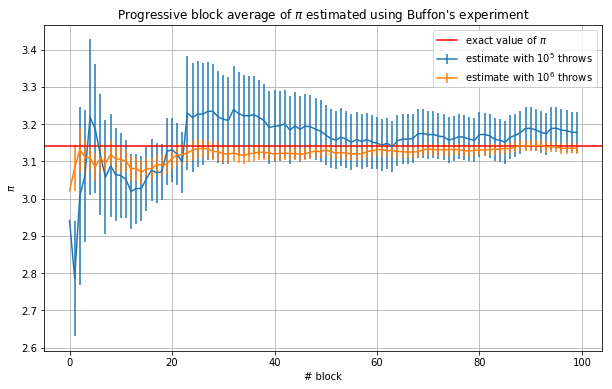

In [29]:
N=100
x=np.arange(N)
fig = plt.figure(figsize=[10,6])
pi_ave_1,err_1 = np.loadtxt("data_1_3/pi_extimation_1.txt",usecols=(0,1), unpack='true')
pi_ave,err = np.loadtxt("data_1_3/pi_extimation.txt",usecols=(0,1), unpack='true')

plt.title ('Progressive block average of $\pi$ estimated using Buffon\'s experiment')
plt.axhline(y=np.pi, color='r', label = 'exact value of $\pi$')
plt.errorbar(x, pi_ave_1, yerr=err_1, label='estimate with $10^5$ throws')
plt.errorbar(x, pi_ave, yerr=err, label='estimate with $10^6$ throws')

plt.xlabel('# block')
plt.ylabel('$\pi$')
plt.legend()
plt.grid(True)
plt.show()

As we can see, the progressive estimate gets closer and closer to the exact value of $\pi$, with a statistically compatible estimate. By increasing the number of throws the same value is obtained much faster with greater precision, thanks to the blocking method and rapid decrease of the statistical uncertainty.